In [1]:
!pip -q install torch torchvision torchaudio
!pip -q install --upgrade diffusers==0.30.2 transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 130.2 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionPipeline

In [4]:
from huggingface_hub import login
login()   # paste your Hugging Face access token here
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your text prompt: cyberpunk city


  0%|          | 0/25 [00:00<?, ?it/s]

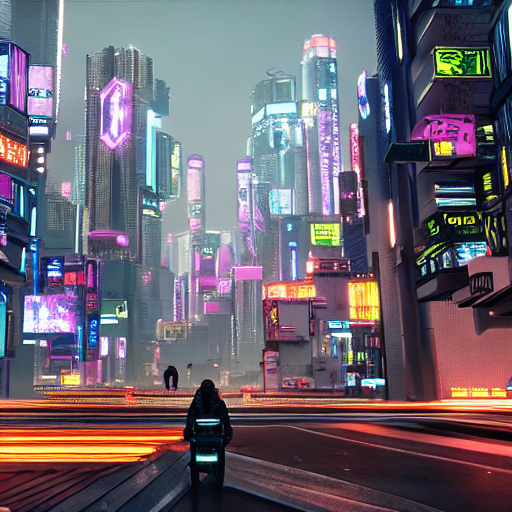

In [5]:
# Ask user for a prompt
prompt = input("Enter your text prompt: ")

negative_prompt = "low quality, blurry, watermark, text"
generator = torch.Generator("cuda").manual_seed(42)

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.5,
    generator=generator
).images[0]

image


In [6]:
from google.colab import drive
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/mini-project-ai-art/outputs"
import os
os.makedirs(SAVE_DIR, exist_ok=True)


Mounted at /content/drive


In [7]:
out_path = f"{SAVE_DIR}/output1.png"
image.save(out_path)
print("Image saved at:", out_path)


Image saved at: /content/drive/MyDrive/mini-project-ai-art/outputs/output1.png
